<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import load_model

from keras.datasets.cifar10 import load_data

(x_train, y_train), (x_test, y_test) = load_data()



In [97]:
x_train.shape

(50000, 32, 32, 3)

In [98]:
y_train.shape

(50000, 1)

In [99]:
x_test.shape

(10000, 32, 32, 3)

In [100]:
y_test.shape

(10000, 1)

In [101]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(Dense(10, activation='linear'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               1573376   
                                                                 
 dense_31 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


Hinh nay la: [2]


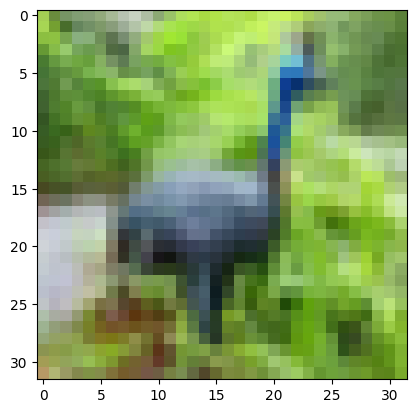

In [102]:
hinh= x_train[6]   
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("Hinh nay la:",y_train[6])

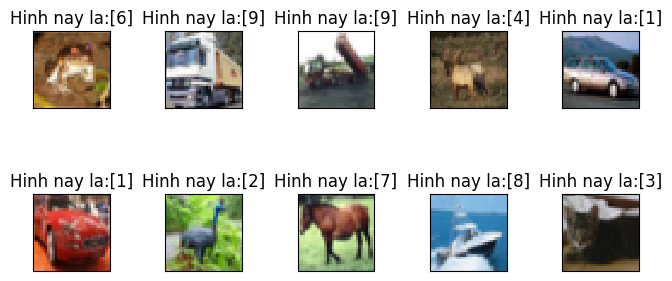

In [103]:
for i in range(10):
  plt.subplot(3,5,i+1)  
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("Hinh nay la:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [104]:
model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'linear'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               1573376   
                                                                 
 dense_33 (Dense)            (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [105]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [106]:
#Lệnh chuyển kênh
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

In [107]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) 
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
391/391 [==============================] - 8s 20ms/step - loss: 11.6058 - accuracy: 0.1127
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 4/10
391/391 [==============================] - 8s 20ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 5/10
391/391 [==============================] - 8s 22ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 6/10
391/391 [==============================] - 9s 22ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 7/10
391/391 [==============================] - 8s 20ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 8/10
391/391 [==============================] - 8s 21ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 9/10
391/391 [==============================] - 9s 22ms/step - loss: 11.2830 - accuracy: 0.1073
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 11.2843

In [108]:
#Lưu file vừa train
model.save('model_cifar10.h5')

In [109]:
# Tải mô hình từ file đã lưu
model = load_model('./model_cifar10.h5')